# Linear Algebra

For a linear system of equations, we need to know:

* Does a solution actually exist?
* Are there in fact many solutions, and if so how should we interpret them?
* If no solution exists, is there a best “approximate” solution?
* If a solution exists, how should we compute it?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d
from scipy.linalg import inv, solve, det, eig

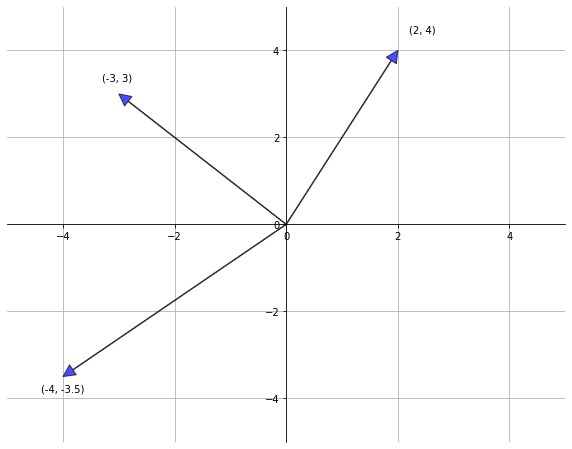

In [7]:
# plot vectors
fig, ax = plt.subplots(figsize=(10, 8))
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                                shrink=0,
                                alpha=0.7,
                                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))  # add text, ax.test(postion-x, postion-y, test-string)  
plt.show()

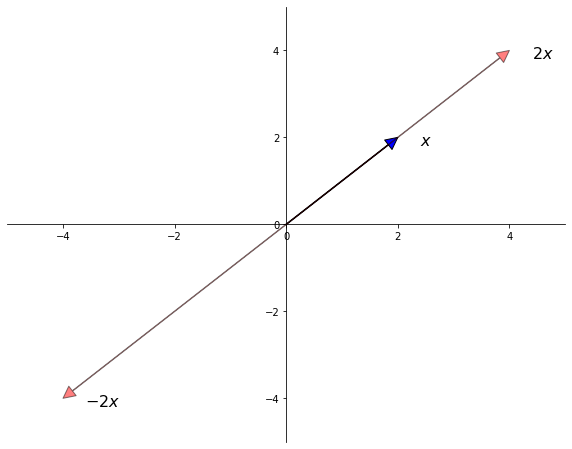

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate('', xy=x, xytext=(0, 0),
            arrowprops=dict(facecolor='blue',
            shrink=0,
            alpha=1,
            width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')

scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.5,
                width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')
plt.show()

In [10]:
# vector operation
x = np.ones(3)
y = np.array((2, 4, 6))
x + y

array([3., 5., 7.])

In [11]:
np.sum(x * y)  # inner product

12.0

In [12]:
np.sqrt(np.sum(x**2))  # norm of x

1.7320508075688772

In [13]:
np.linalg.norm(x)

1.7320508075688772

In [14]:
# matrix operation
A = np.identity(3)
2 * A

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [15]:
B = np.ones((3, 3))
A + B

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

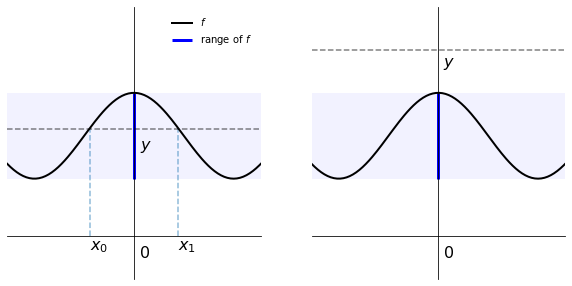

In [19]:
def f(x):
    return 0.6 * np.cos(4 * x) + 1.4

xmin, xmax = -1, 1
x = np.linspace(xmin, xmax, 160)
y = f(x)
ya, yb = np.min(y), np.max(y)

fix, axes = plt.subplots(1, 2, figsize=(10, 5))
for ax in axes:
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
    
    ax.set(ylim=(-0.6, 3.2), xlim=(xmin, xmax), yticks=(), xticks=())

    ax.plot(x, y, 'k-', lw=2, label='$f$')
    ax.fill_between(x, ya, yb, facecolor='blue', alpha=0.05)
    ax.vlines([0], ya, yb, lw=3, color='blue', label='range of $f$')
    ax.text(0.04, -0.3, '$0$', fontsize=16)

ax = axes[0]

ax.legend(loc='upper right', frameon=False)
ybar = 1.5
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.05, 0.8 * ybar, '$y$', fontsize=16)
for i, z in enumerate((-0.35, 0.35)):
    ax.vlines(z, 0, f(z), linestyle='--', alpha=0.5)
    ax.text(z, -0.2, f'$x_{i}$', fontsize=16)

ax = axes[1]

ybar = 2.6
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.04, 0.91 * ybar, '$y$', fontsize=16)

plt.show()


In [20]:
A = np.array(((1, 2), (3, 4)))
y = np.ones((2, 1))
det(A)  # if the determinant of A is not zero, we say A is nonsingular

-2.0

In [21]:
inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [23]:
x = inv(A) @ y
x

array([[-1.],
       [ 1.]])

In [24]:
solve(A, y)

array([[-1.],
       [ 1.]])

In [25]:
A = ((1, 2),
     (2, 1))

A = np.array(A)
evals, evecs = eig(A)
evals

array([ 3.+0.j, -1.+0.j])

In [26]:
evecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])